In [104]:
import numpy as np

class Kmeans:
  def __init__(self, X, k=3, n=10):
    self.k = k
    self.X = X
    self.n = n
    #randomly select k points from X
    #selected_indices = np.random.choice(self.X.shape[0],self.k, replace=False)
    #or pick first k rows
    self.centroids = self.X[0:self.k,]

  def predict_clusters(self, X):
    #iterate over points and assign them to a centroid
    x_assigned = np.zeros(X.shape[0])
    for idx, x in enumerate(X):
      #iterate over centroids and pick the closest one
      dmin = float("inf")
      selected_centroid_idx = None
      for i, centroid in enumerate(self.centroids):
        #calculate euclidian distance
        d = np.sqrt(((x-centroid)**2).sum())
        if d < dmin:
          dmin = d
          selected_centroid_idx = i
      x_assigned[idx] = selected_centroid_idx
    return x_assigned

  def create_clusters(self):
    #n iterations
    for i in range(self.n):
      centroid_idx = self.predict_clusters(self.X)
      new_centroids = np.zeros((self.k, self.X.shape[1]))
      cnt = [0] * self.k
      for idx, x in enumerate(self.X):
        new_centroids[int(centroid_idx[idx])] = new_centroids[int(centroid_idx[idx])] + self.X[idx]
        cnt[int(centroid_idx[idx])] = cnt[int(centroid_idx[idx])] + 1
      for i in range(self.k):
        if cnt[i] > 0.0:
          new_centroids[i] = new_centroids[i]/cnt[i]
      self.centroids = new_centroids


In [105]:
X = np.random.rand(100,2)
X = 100*X

In [106]:
kmeans = Kmeans(X, 3, 10)

In [107]:
kmeans.create_clusters()

In [108]:
x_assigned = kmeans.predict_clusters(X)

In [109]:
kmeans.centroids

array([[69.82914229, 81.74543845],
       [21.92210297, 71.05373209],
       [43.81467337, 23.72999039]])

In [110]:
import matplotlib.pyplot as plt

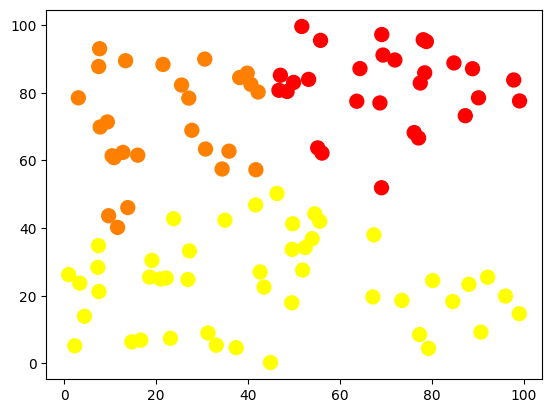

In [111]:
plt.scatter(X[:,0], X[:,1], c=x_assigned, cmap=plt.cm.autumn,s=100)
